
# Tarea 4
## Francisco Javier Peralta Ramírez

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC #support vector classification, can be linear, rbf, poli, etc

Probar clasificación multiclase con SVM. Usar la Base de Datos IRIS. Compare el desempeño de la lineal-SVM vs kernel-SVM usando la librería en sklearn

In [3]:
iris = datasets.load_iris() #we know classes 2 and 3 are not linearly separable!

In [4]:
svm_lin = SVC(kernel='linear') #instantiate a classifier with linnear kernel
svm_rbf = SVC(kernel='rbf', gamma='auto') #instantiate a classifier with linnear kernel

Para simplificar el proceso de graficacar, se seleccionaron los ultimos 1 y cuatro ya que estos mostraron diferencias entre usar kernel linear y gaussiano.

In [10]:
n_data = iris.data[:, [0, 3]]
rands = np.arange(0,150)
np.random.shuffle(rands)
data = n_data[rands[:100]]
target = iris.target[rands[:100]]
svm_lin.fit(data, target)
svm_rbf.fit(data, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Obtenemos el score sobre los datos que se usaron para aprender.

In [11]:
print("Linear {}".format(svm_lin.score(data, target) ))
print("RBF {}".format(svm_rbf.score(data, target) ))

Linear 0.94
RBF 0.96


Y sobre datos desconocidos.

In [13]:
u_data = n_data[rands[100:]]
u_target = iris.target[rands[100:]]
print("Linear {}".format(svm_lin.score(u_data, u_target) ))
print("RBF {}".format(svm_rbf.score(u_data, u_target) ))

Linear 0.98
RBF 0.98


Como podemos ver, la mejora es muy pequeña sobre los datos de entrenamiento y sobre datos nuevos (en este caso) no hubo mejora. También es importante notar que si se usa todo el vector de caracterísitcas, ambos algoritmos dan los mismos resultados.

Podemos graficar ambos algoritmos, los vectores de soporte y las lineas de frontera. Para el kernel gausseano podríamos grafiar la Gausseana correspondiente.

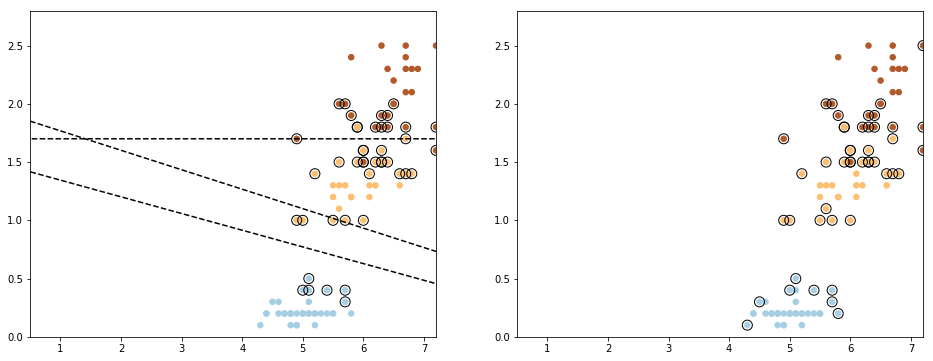

In [12]:
#from https://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py
def plot_hyperplane(ax, clf, min_x, max_x, linestyle, index=0):
    # get the separating hyperplane
    w = clf.coef_[index]
    a = -w[0] / w[1]
    xx = np.linspace(min_x, max_x)
    yy = a * xx - (clf.intercept_[index]) / w[1]
    ax.plot(xx, yy, linestyle)

f, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(data[:, 0], data[:, 1], c=target, s=30, cmap=plt.cm.Paired)

# plot support vectors
# from https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
ax[0].scatter(svm_lin.support_vectors_[:, 0], svm_lin.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plot_hyperplane(ax[0], svm_lin, 0, 8, 'k--', 0) # division entre 1 y 2
plot_hyperplane(ax[0], svm_lin, 0, 8, 'k--', 1) # entre 1 y 3
plot_hyperplane(ax[0], svm_lin, 0, 8, 'k--', 2) # entre 2 y 3
ax[0].set_xlim((0.5, 7.2))
ax[0].set_ylim((0, 2.8))

ax[1].scatter(data[:, 0], data[:, 1], c=target, s=30, cmap=plt.cm.Paired)

# plot support vectors
# from https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
ax[1].scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

ax[1].set_xlim((0.5, 7.2))
ax[1].set_ylim((0, 2.8))

plt.show()

 Implemente la clasificación binaria mediante Kernel-SVM basada el decaf-pg. Elija dos clases no lineal-mente separables de la BD IRIS. Discuta como se podría extender la solución a mas de dos clases.

Como ya sabemos de clases anterioers, la clase dos y tres no son linealmente separables.

In [141]:
data   = iris.data[iris.target > 0, 2:]
target =  2 * iris.target[iris.target > 0] - 3

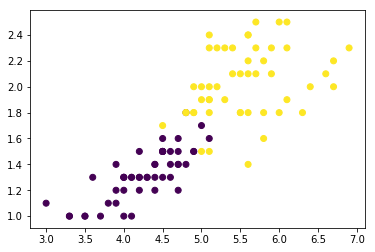

In [142]:
plt.scatter(data[:,0], data[:,1], c=target)

Recordamos que el problem a optimizar está dado por

\begin{align*} 
\min_{w, b} \,\,\, & \frac{1}{2} ||w|| + C\sum_{i = 1}^{m} \xi_i \\
\text{s.a.}\,\,\,\, & y_i (w_i x_i + b) \geq 1 - \xi_i \,\,\, i = 1, \ldots, m\\
& \xi_i \geq  \,\,\,  i = 1, \ldots, m\\
\end{align*}

Al igual que con la SVM en casos separables, podemos formar el Lagrangiano

\begin{align*} 
\mathcal{L}(w, b, \xi, \alpha, r) = \frac{1}{2} w^T w + C\sum_{i=1}^m \xi_i - \sum_{i=1}^m \alpha_i y_i [ (w x_i + b) -1 + \xi_i] - \sum_{i=1}^m r_i \xi_i
\end{align*}

donde $\alpha_i$ y  $r_i$ son nuestros multiplicadores de Lagrange, restringidos a ser $\geq 0$

Derivado con respecto a nuestras variables e iguando a cero obtenemos

\begin{align*} 
\nabla_w \mathcal{L} & = w - \sum_{i=1}^m \alpha_i y_i x_i = 0\\
\rightarrow w &= \sum_{i=1}^m \alpha_i y_i x_i\\
\nabla_b \mathcal{L} & = \sum_{i=1}^m \alpha_i y_i = 0 \\
\nabla_{\xi} \mathcal{L} & = C \textbf{1} - \alpha - r\\
\end{align*}

Substituyendo estos valores en el Lagrangiano obtenemos

\begin{align*} 
\mathcal{L}(w, b, \xi, \alpha, r) = 
\frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i y_i \alpha_j y_j \langle\ x_i, x_j \rangle 
- \sum_{i=1}^m \sum_{j=1}^m \alpha_i y_i \alpha_j y_j \langle\ x_i, x_j \rangle 
+ \sum_{i=1}^m a_i - b \sum_{i=1}^m a_i y_i - \sum_{i=1}^m \alpha_i \xi_i
- \sum_{i=1}^m r_i \xi_i +  C\sum_{i=1}^m \xi_i
\end{align*}

De $\nabla_{\xi}$ podemos ver que la suma de los últimos tres términos da cero, y de $\nabla_{b}$ vemos que el cuarto término también es cero. Por lo que tenemos

\begin{align*} 
\mathcal{L}(w, b, \xi, \alpha, r) = 
- \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i y_i \alpha_j y_j \langle\ x_i, x_j \rangle 
+ \sum_{i=1}^m a_i
\end{align*}

Esto nos da el problema $\max_{\alpha} \mathcal{L}(w, b, \xi, \alpha, r)$ que puede ser visto como el problema de minimización

\begin{align*} 
\min_{\alpha} & \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i y_i \alpha_j y_j \langle\ x_i, x_j \rangle 
- \sum_{i=1}^m a_i \\
\text{s.a.}\,\,\,\, & y_i (w_i x_i + b) \geq 1 - \xi_i \,\,\, i = 1, \ldots, m\\
& \xi_i \geq  \,\,\,  i = 1, \ldots, m\\
\end{align*}

Para poder clasificar datos no lineales podemos usar el "kernel trick" el cual consiste en subsitur $k(x_i, x_j) = \langle\ x_i, x_j \rangle = \phi(x_i, x_j)$. Donde k(x_i, x_j) es una función. Es importante tener en cuenta que para ser un kernel valido la matrix $\phi(x_i, x_j)\phi(x_i, x_j)^T$ debe ser positiva definida. Con esto en mente nuestro problema de optimización es:

\begin{align*} 
\min_{\alpha} & \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i y_i \alpha_j y_j k(x_i, x_j)
- \sum_{i=1}^m a_i \\
\text{s.a.}\,\,\,\, & y_i (w_i x_i + b) \geq 1 - \xi_i \,\,\, i = 1, \ldots, m\\
& \xi_i \geq  \,\,\,  i = 1, \ldots, m\\
\end{align*}

Y clasificamos con sgn$[\alpha^T y k(x', x_i)]$ donde $k(x', x_i) = (k(x_0, x_i), \ldots, k(x_m, x_i) )^T$